<a href="https://colab.research.google.com/github/RaghadAlnouri/Raghad/blob/master/R_Alnouri_RNN_types_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of some size (between 10 and 50) - Similar to this [example](https://colab.research.google.com/drive/1tj0DRWxVvRC7_b7ubQ46zJo4ZuxT4jbW?authuser=1)
4. Split the data into train and test
5. Use 3 different RNN types and rank them in terms of performance - only use the functional API of Keras

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2020-02-26 15:42:22--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv.6’

sunspots.csv.6      100%[===================>]  43.98K  --.-KB/s    in 0s      

2020-02-26 15:42:22 (155 MB/s) - ‘sunspots.csv.6’ saved [45039/45039]

--2020-02-26 15:42:23--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c18::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv.5’

temperatures.csv.5  100%[===================>]

In [0]:
from google.colab import files
uploaded = files.upload()


Saving sunspots.csv to sunspots (6).csv


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('sunspots.csv')

df.head(10)

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [0]:
sequence = df.Sunspots.values
sequence_train = sequence[: int(0.5 * len(sequence))] 
sequence_test = sequence[ int(0.5 * len(sequence)): ]

In [0]:
def generate_data(sequence, input_sequence_length):
  
  X = []
  y = []

  for i in range(len(sequence) - input_sequence_length - 1):
    subsequence = sequence[i: i + input_sequence_length]
    target = sequence[i + input_sequence_length ]
    X.append(subsequence)
    y.append(target)

  X = np.array(X)
  y = np.array(y)
  return X, y



In [0]:
input_sequence_length = 50
sequence_train_data = generate_data(sequence_train, input_sequence_length)
sequence_test_data = generate_data(sequence_test, input_sequence_length)

sequence_test_data[0].shape


(1359, 50)

In [0]:
sequence_train_data[1].shape

(1359,)

In [0]:
X, y = sequence_train_data
X_test, y_test = sequence_test_data


# reshaping
X, y = X[:,:,None], y[:,None]
X_test, y_test = X_test[:,:,None], y_test[:,None]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf


In [0]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Input, Dense, LSTM, SimpleRNN, GRU

inputs = Input(shape=(input_sequence_length,1))
hidden = SimpleRNN(100, input_shape=(input_sequence_length,), return_sequences=True)(inputs)
hidden = SimpleRNN(100, input_shape=(input_sequence_length,100), return_sequences=True)(hidden)
hidden = SimpleRNN(100, input_shape=(input_sequence_length,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='Simple_model')
func_model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error ])
func_model.summary()


Model: "Simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50, 100)           10200     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 50, 100)           20100     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_Simple = func_model.fit(X, y, batch_size=200, epochs=50, validation_data=[X_test, y_test])

Train on 1359 samples, validate on 1359 samples
Epoch 1/50
1359/1359 [==============================] - 2s 2ms/sample - loss: 3398.0670 - mean_squared_error: 3398.0669 - val_loss: 4537.5648 - val_mean_squared_error: 4537.5649
Epoch 2/50
1359/1359 [==============================] - 1s 493us/sample - loss: 2994.1992 - mean_squared_error: 2994.1990 - val_loss: 4262.0260 - val_mean_squared_error: 4262.0259
Epoch 3/50
1359/1359 [==============================] - 1s 530us/sample - loss: 2826.7014 - mean_squared_error: 2826.7017 - val_loss: 4124.8544 - val_mean_squared_error: 4124.8545
Epoch 4/50
1359/1359 [==============================] - 1s 526us/sample - loss: 2729.1890 - mean_squared_error: 2729.1890 - val_loss: 4023.4834 - val_mean_squared_error: 4023.4834
Epoch 5/50
1359/1359 [==============================] - 1s 550us/sample - loss: 2653.5247 - mean_squared_error: 2653.5249 - val_loss: 3943.1373 - val_mean_squared_error: 3943.1377
Epoch 6/50
1359/1359 [==============================] 

In [0]:
history_Simple.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

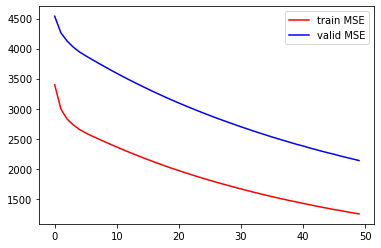

In [0]:
import matplotlib.pyplot as plt
plt.plot(history_Simple.history['mean_squared_error'], 'r')
plt.plot(history_Simple.history['val_mean_squared_error'], 'b')
plt.legend(['train MSE', 'valid MSE'])

In [0]:
inputs = Input(shape=(input_sequence_length,1))
hidden = LSTM(100, input_shape=(input_sequence_length,), return_sequences=True)(inputs)
hidden = LSTM(100, input_shape=(input_sequence_length,100), return_sequences=True)(hidden)
hidden = LSTM(100, input_shape=(input_sequence_length,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='LSTM_model')
func_model.compile(loss=keras.losses.mean_squared_error, 
                   optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error])
func_model.summary()



Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 100)           40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 100)           80400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_LSTM = func_model.fit(X, y, batch_size=200, epochs=50, validation_data=[X_test, y_test])

Train on 1359 samples, validate on 1359 samples
Epoch 1/50
1359/1359 [==============================] - 4s 3ms/sample - loss: 3526.1045 - mean_squared_error: 3526.1045 - val_loss: 4716.3583 - val_mean_squared_error: 4716.3584
Epoch 2/50
1359/1359 [==============================] - 0s 118us/sample - loss: 3114.1062 - mean_squared_error: 3114.1060 - val_loss: 4354.3907 - val_mean_squared_error: 4354.3906
Epoch 3/50
1359/1359 [==============================] - 0s 121us/sample - loss: 2861.5536 - mean_squared_error: 2861.5537 - val_loss: 4107.3867 - val_mean_squared_error: 4107.3862
Epoch 4/50
1359/1359 [==============================] - 0s 113us/sample - loss: 2702.8167 - mean_squared_error: 2702.8169 - val_loss: 3967.8370 - val_mean_squared_error: 3967.8369
Epoch 5/50
1359/1359 [==============================] - 0s 114us/sample - loss: 2609.4506 - mean_squared_error: 2609.4507 - val_loss: 3877.7085 - val_mean_squared_error: 3877.7085
Epoch 6/50
1359/1359 [==============================] 

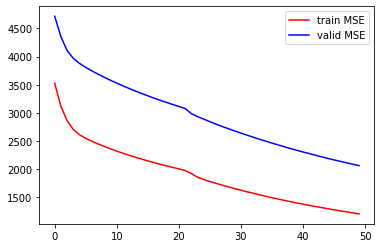

In [0]:
import matplotlib.pyplot as plt
plt.plot(history_LSTM.history['mean_squared_error'], 'r')
plt.plot(history_LSTM.history['val_mean_squared_error'], 'b')
plt.legend(['train MSE', 'valid MSE'])

In [0]:
inputs = Input(shape=(input_sequence_length,1))
hidden = GRU(100, input_shape=(input_sequence_length,), return_sequences=True)(inputs)
hidden = GRU(100, input_shape=(input_sequence_length,100), return_sequences=True)(hidden)
hidden = GRU(100, input_shape=(input_sequence_length,100))(hidden)
outputs = Dense(1)(hidden)
func_model = keras.Model(inputs=inputs, outputs=outputs, name='GRU_model')
func_model.compile(loss=keras.losses.mean_squared_error, 
                   optimizer=keras.optimizers.Adam(), 
                   metrics=[keras.metrics.mean_squared_error])
func_model.summary()



Model: "GRU_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50, 100)           30900     
_________________________________________________________________
gru_4 (GRU)                  (None, 50, 100)           60600     
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 152,201
Trainable params: 152,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_GRU = func_model.fit(X, y, batch_size=200, epochs=50, validation_data=[X_test, y_test])


Train on 1359 samples, validate on 1359 samples
Epoch 1/50
1359/1359 [==============================] - 3s 2ms/sample - loss: 3409.1019 - mean_squared_error: 3409.1023 - val_loss: 4457.4168 - val_mean_squared_error: 4457.4170
Epoch 2/50
1359/1359 [==============================] - 0s 112us/sample - loss: 2879.0624 - mean_squared_error: 2879.0625 - val_loss: 4079.4916 - val_mean_squared_error: 4079.4915
Epoch 3/50
1359/1359 [==============================] - 0s 106us/sample - loss: 2677.4173 - mean_squared_error: 2677.4172 - val_loss: 3946.6944 - val_mean_squared_error: 3946.6943
Epoch 4/50
1359/1359 [==============================] - 0s 104us/sample - loss: 2596.5700 - mean_squared_error: 2596.5698 - val_loss: 3872.7762 - val_mean_squared_error: 3872.7764
Epoch 5/50
1359/1359 [==============================] - 0s 101us/sample - loss: 2541.8581 - mean_squared_error: 2541.8582 - val_loss: 3808.9223 - val_mean_squared_error: 3808.9224
Epoch 6/50
1359/1359 [==============================] 

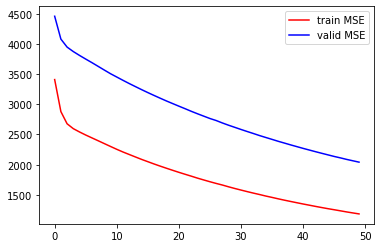

In [0]:
plt.plot(history_GRU.history['mean_squared_error'], 'r')
plt.plot(history_GRU.history['val_mean_squared_error'], 'b')
plt.legend(['train MSE', 'valid MSE'])

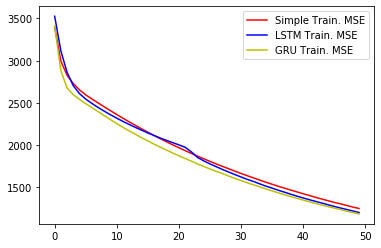

In [0]:
plt.plot(history_Simple.history['mean_squared_error'],'r' ,history_LSTM.history['mean_squared_error'], 'b', history_GRU.history['mean_squared_error'], 'y')
plt.legend(['Simple Train. MSE', 'LSTM Train. MSE', 'GRU Train. MSE'])

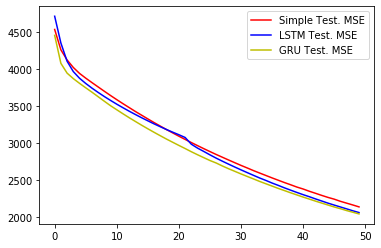

In [0]:
plt.plot(history_Simple.history['val_mean_squared_error'], 'r', history_LSTM.history['val_mean_squared_error'] , 'b', history_GRU.history['val_mean_squared_error'], 'y')
plt.legend(['Simple Test. MSE', 'LSTM Test. MSE', 'GRU Test. MSE'])

It is clear that both LSTM and GRU models are faster than the Simple RNN, also they have better performance in terms of the mean square error.

Now if we compare LSTM and GRU models, we can see that they are very close to each other here in my experiment. However, the GRU model is a bit faster and has less mean square error on testing data.
Therefore, I can give them the following ranking:
1- GRU 
2- LSTM
3- Simple RNN